In [32]:
import pandas as pd
import sqlite3

In [33]:
#Establish connection with our database
dat = sqlite3.connect('20170509-bam-2.2m-Nja9G.sqlite') #connected to database with out error

#Querys 
dfSOURCE = pd.read_sql_query("SELECT * FROM modules", dat)
dfSCORES = pd.read_sql_query("SELECT * FROM scores", dat)

#Categorial values we will store, paintType emotion and content
paintType=['media_oilpaint','media_3d_graphics','media_pen_ink','media_comic',
           'media_comic','media_vectorart','media_graphite','media_watercolor']

emotion=['emotion_gloomy','emotion_happy','emotion_peaceful','emotion_scary']
content=['content_bicycle','content_bird','content_building','content_cars','content_cat','content_dog','content_flower','content_people','content_tree']

#Store the categorical value that defines each img

dfSCORES['paintType']=dfSCORES[paintType].idxmax(axis=1)
dfSCORES['emotion']=dfSCORES[emotion].idxmax(axis=1)
dfSCORES['content']=dfSCORES[content].idxmax(axis=1)

dfSCORES['TOPpaintType']= dfSCORES[paintType].max(axis=1)
dfSCORES['TOPemotion']=dfSCORES[emotion].max(axis=1)
dfSCORES['TOPcontent']=dfSCORES[content].max(axis=1)


listC=['mid','paintType','emotion','content','TOPcontent','TOPemotion','TOPpaintType']
df=pd.merge(dfSOURCE, dfSCORES[listC], on =['mid'])

In [34]:
df.head()

,mid,project_id,src,mature_content,license,paintType,emotion,content,TOPcontent,TOPemotion,TOPpaintType
0,125829121,18589705,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc,media_oilpaint,emotion_happy,content_cars,-0.098892,-2.954691,-9.357111
1,34253483,4357109,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_oilpaint,emotion_happy,content_dog,-0.061217,-0.180663,-6.377277
2,88080407,7294129,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_vectorart,emotion_happy,content_people,-1.332626,-0.771889,-0.200894
3,16777240,2270370,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_comic,emotion_happy,content_people,-1.213955,-0.622210,-0.094686
4,62914589,8359181,https://mir-s3-cdn-cf.behance.net/project_modu...,0.0,cc by-nc-nd,media_pen_ink,emotion_gloomy,content_building,-1.464100,-0.186630,-3.132857


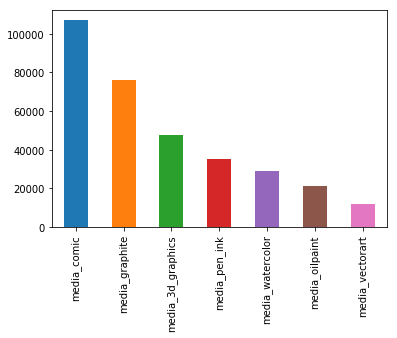

In [35]:
df=df.loc[df['TOPpaintType'] >= -0.1]
df['paintType'].value_counts().plot(kind='bar')

In [37]:
df = df.reset_index(drop=True)
listC=['mid','src','paintType','emotion','content']
df=df[listC]
df.loc[0]['src']

'https://mir-s3-cdn-cf.behance.net/project_modules/disp/a8ff3b16777240.5603af934184e.jpg'

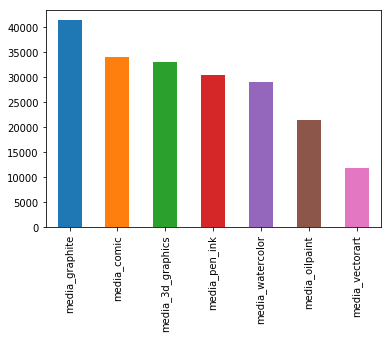

In [6]:
for u in paintType:
    aux=df.loc[df['paintType'] == u]
    samples=len(aux)-30000 
    if(samples<0):
        samples=0
    df.drop(aux.sample(samples,replace=True).index,inplace=True)
    
df['paintType'].value_counts().plot(kind='bar')

In [10]:
df = df.reset_index(drop=True)

In [ ]:
df.loc[40].values

In [31]:
import requests
import os

for type in paintType:
    if not os.path.exists(type):
        os.mkdir(type)

for u in range(len(df)):
    row = df.loc[0]
    imgClass = row['paintType']
    url = row['src']
    filename = imgClass + '/'+str(u)+'.jpg'
    result = requests.get(url, stream=True)
    if result.status_code == 200:
        print(url)
        image = result.raw.read()
        open(filename,"wb").write(image)

KeyboardInterrupt: 